In [ ]:
def div_abu_plot(expression_mx,table_ratio,savefig=True):
    #### Diversity matrix
    type_counts_sample = pd.DataFrame()
    for samplename in expression_mx.columns.values:
        #names_[samplename] = expression_mx[samplename].index

        filter_zero_samplename = expression_mx.iloc[np.where(expression_mx[samplename]>0)[0],:]
        names = filter_zero_samplename.index
        names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
        type_counts = np.unique(names_type, return_counts = True)
        new = pd.DataFrame({'type' : type_counts[0],
                            samplename : type_counts[1],
                           })
        new = new.set_index('type')
        type_counts_sample = pd.concat([type_counts_sample, new], axis=1)#, join_axes=[df1.index]

    ####mean_sd matrix
    xticks = type_counts_sample.index.tolist()
    Means = type_counts_sample.mean(axis=1).values.tolist()
    Std=type_counts_sample.std(axis=1).values.tolist()
    mean_sd = pd.DataFrame(data = {'type':xticks,'mean':Means,'std':Std})
    mean_sd = mean_sd.sort_values(by='mean',ascending=False)
    mean_sd = mean_sd.set_index('type')
    Std = [[0]*len(mean_sd['std'].tolist()),mean_sd['std'].tolist()]
    ab = table_ratio*100
    ab['genomic'] = ab['intron'] + ab['promoter'] + ab['enhancer'] + ab['repeats'] + ab['circRNA'] +ab['other']
    xticks_ab = ab.columns.tolist()
    Means_ab = ab.mean(axis=0).values.tolist()
    Std_ab = ab.std(axis=0).values.tolist()
    mean_sd_ab = pd.DataFrame(data = {'type':xticks_ab,'mean_ab':Means_ab,'std_ab':Std_ab})
    mean_sd_ab = mean_sd_ab.set_index('type')
    N = type_counts_sample.shape[0]
    ind = np.arange(N)
    merge = pd.concat([mean_sd,mean_sd_ab],axis=1,join_axes=[mean_sd.index])
    Std_ab = [[0]*len(merge['std_ab'].tolist()),merge['std_ab'].tolist()]
    xticks = merge.index.tolist()
    ####plot
    plt.rcParams['figure.dpi'] = 300    
    fig,(ax,ax1) = plt.subplots(1,2,figsize = (7,3.5))
    ax.barh(ind,merge['mean'],0.7,xerr=Std,color='grey')
    ax.invert_xaxis()
    ax = std_plot(ax,'Number of detected genes','','Diversity',left=False,ylim=[-0.5,10.5])#,ylim=[np.min(ind),np.max(ind)]
    ax.set_yticks(ind)
    ax.set_yticks([])
    ax1.barh(ind,merge['mean_ab'],0.7,xerr=Std_ab,color="grey",)
    ax1.set_yticks(ind)
    ax1.set_yticklabels(xticks)
    ax1 = std_plot(ax1,'Percentage of mapped reads (%)','','Abundance',ylim=[-0.5,10.5])
    if savefig is True:
        fig.savefig('diversity_abundance.eps')
    embed_pdf_figure()    

div_abu_plot(expression_mx=original_mx,table_ratio=table_ratio,savefig=True)

In [3]:
dataset='scirep'
reads_preprocess  = True # if start from preprocessing
sequencing_type = 'short'   #short long domain_only transcript
example_cancer = 'Normal-CRC'

file_counts = 'output/'+dataset+'/summary/read_counts.txt'
file_length_path = 'output/'+dataset+'/stats/mapped_read_length_by_sample/'
file_length_path_insert = 'output/'+dataset+'/stats/mapped_insert_size_by_sample/'
plot_save_path = 'output/'+dataset+'/plots/'
if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import ticker

In [7]:
cd ~/ex/

/home/xieyufeng/ex


In [8]:
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'

original_mx = pd.read_table(original_mx_file,index_col=0)

In [19]:
expression_mx = original_mx
type_counts_sample = pd.DataFrame()
for samplename in expression_mx.columns.values:
    #names_[samplename] = expression_mx[samplename].index

    filter_zero_samplename = expression_mx.iloc[np.where(expression_mx[samplename]>0)[0],:]
    names = filter_zero_samplename.index
    names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
    type_counts = np.unique(names_type, return_counts = True)
    new = pd.DataFrame({'type' : type_counts[0],
                        samplename : type_counts[1],
                       })
    new = new.set_index('type')
    type_counts_sample = pd.concat([type_counts_sample, new], axis=1)#, join_axes=[df1.index]

####mean_sd matrix
xticks = type_counts_sample.index.tolist()
Means = type_counts_sample.mean(axis=1).values.tolist()
Std=type_counts_sample.std(axis=1).values.tolist()
mean_sd = pd.DataFrame(data = {'type':xticks,'mean':Means,'std':Std})
mean_sd = mean_sd.sort_values(by='mean',ascending=False)
mean_sd = mean_sd.set_index('type')
Std = [[0]*len(mean_sd['std'].tolist()),mean_sd['std'].tolist()]

N = type_counts_sample.shape[0]
ind = np.arange(N)




In [20]:
mean_sd

,mean,std
type,,
genomic,3408.348958,538.201006
miRNA,752.614583,63.760985
piRNA,430.458333,87.289183
tRNA,426.723958,0.640557
mRNA,425.682292,52.741175
lncRNA,336.260417,34.270634
snRNA,158.760417,0.762262
tucpRNA,156.557292,21.293925
Y_RNA,99.859375,0.566070


In [51]:

fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax

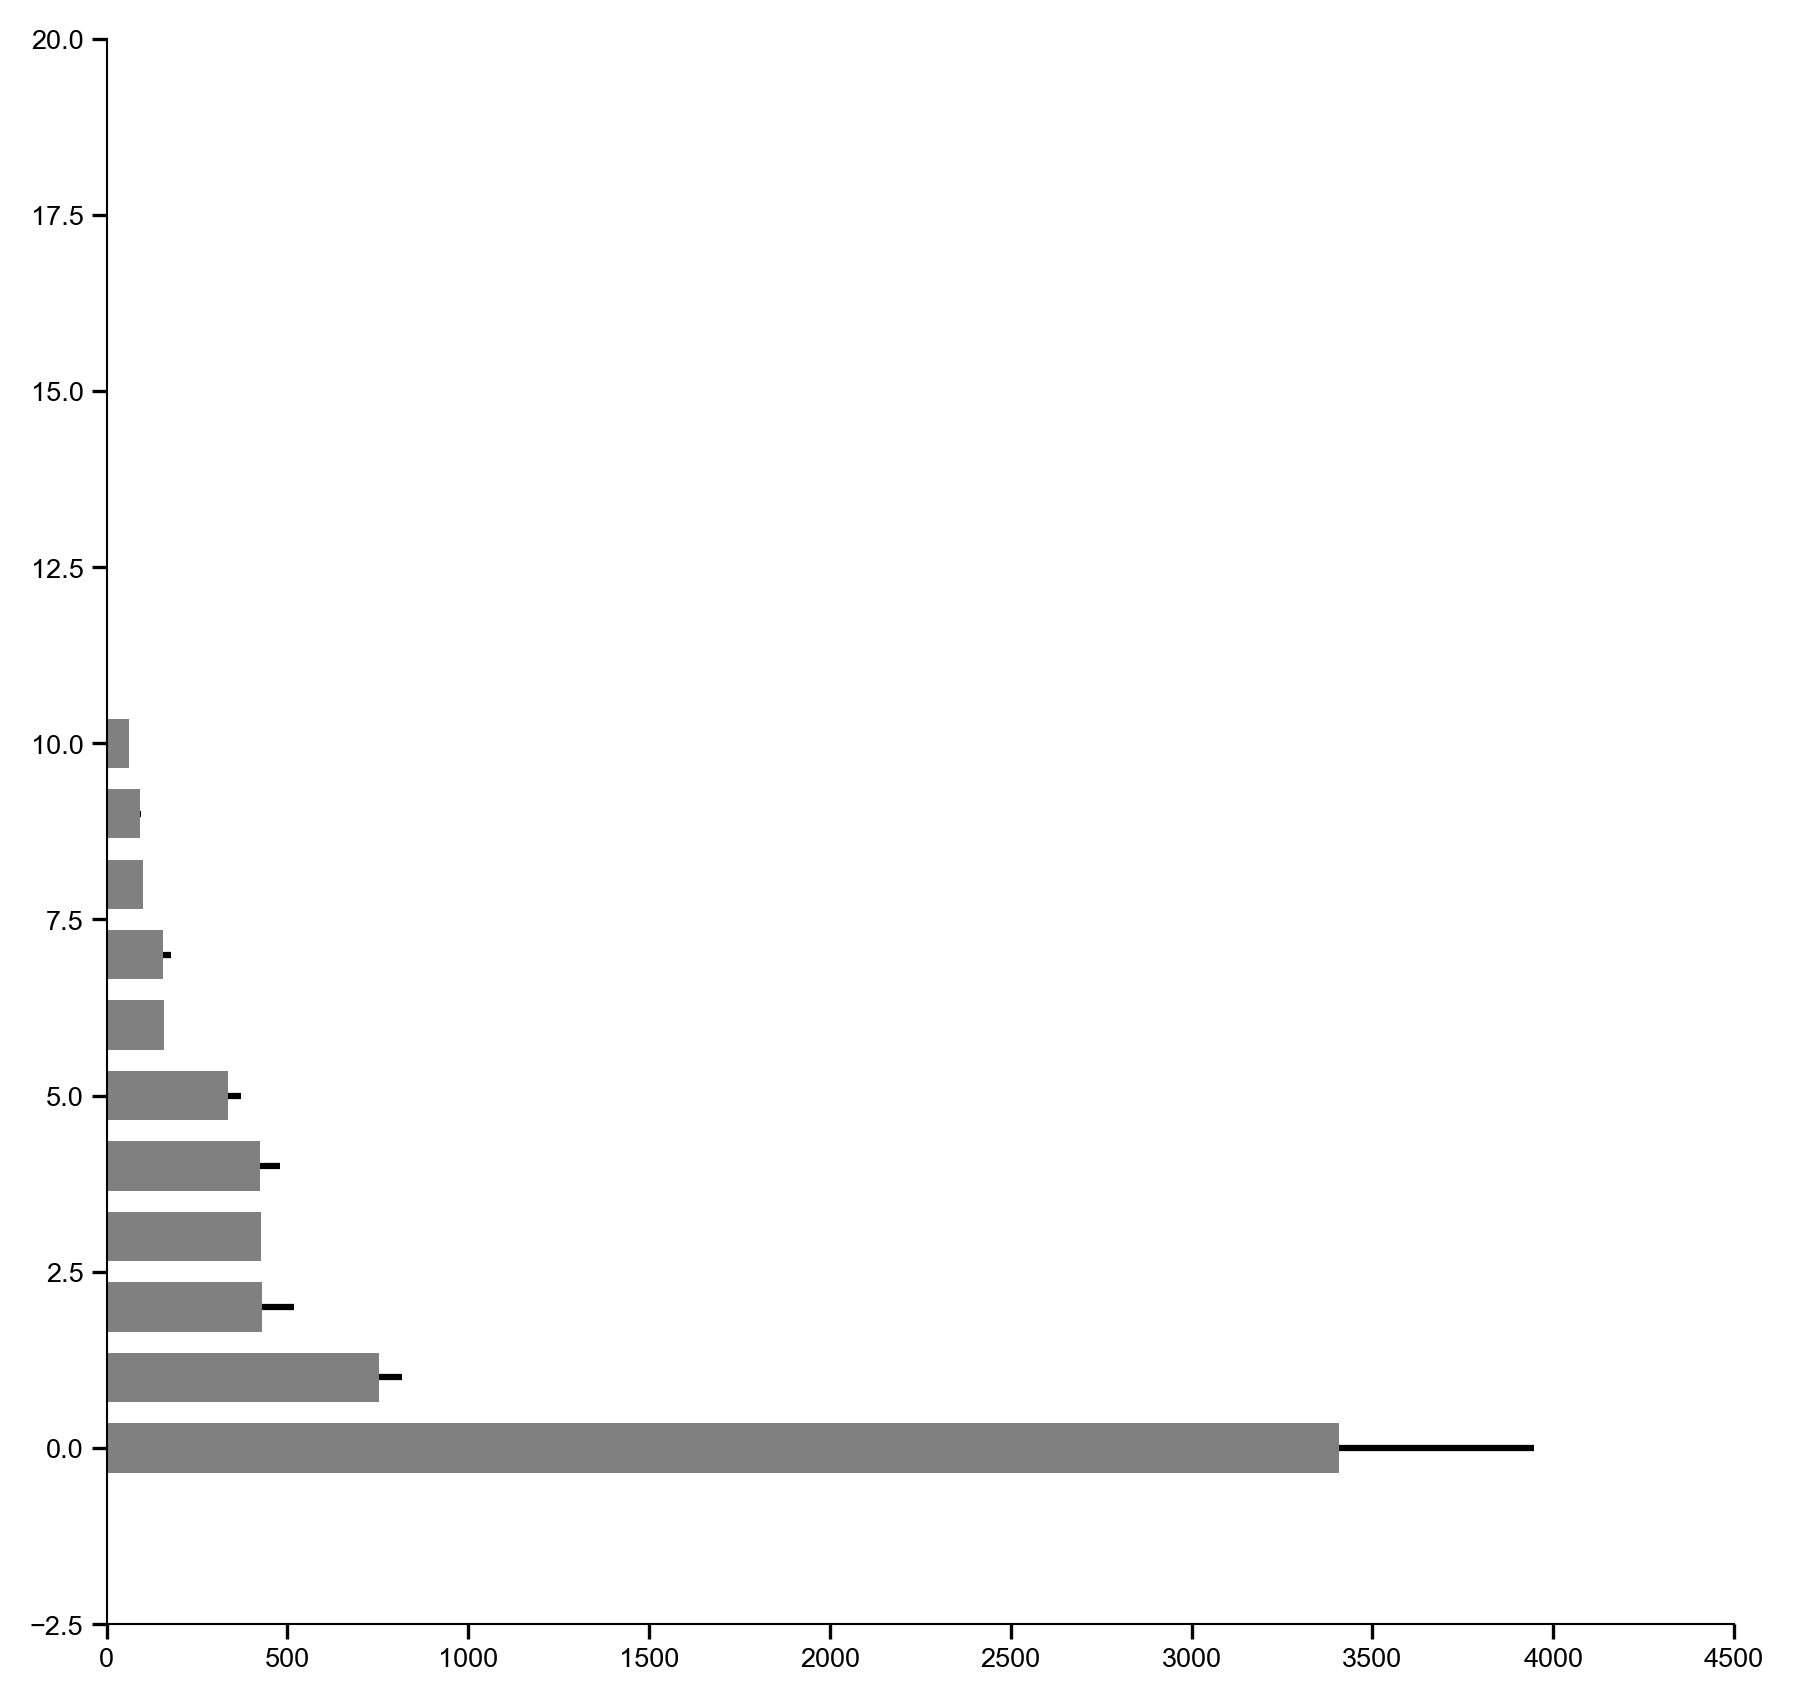

In [60]:
plt.rcParams['figure.dpi'] = 300  
fig,ax = plt.subplots(figsize = (7,7))
ax.barh(ind,mean_sd['mean'],0.7,xerr=Std,color='grey')
std_plot(ax,'','',ylim=[-2,20])
#ticker.MaxNLocator(nbins=1)


In [44]:
ax.get_yticks()

array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.])

In [ ]:
####plot
plt.rcParams['figure.dpi'] = 300    
fig,(ax,ax1) = plt.subplots(1,2,figsize = (7,3.5))
ax.barh(ind,merge['mean'],0.7,xerr=Std,color='grey')
ax.invert_xaxis()
ax = std_plot(ax,'Number of detected genes','','Diversity',left=False,ylim=[-0.5,10.5])#,ylim=[np.min(ind),np.max(ind)]
ax.set_yticks(ind)
ax.set_yticks([])
ax1.barh(ind,merge['mean_ab'],0.7,xerr=Std_ab,color="grey",)
ax1.set_yticks(ind)
ax1.set_yticklabels(xticks)
ax1 = std_plot(ax1,'Percentage of mapped reads (%)','','Abundance',ylim=[-0.5,10.5])
if savefig is True:
    fig.savefig('diversity_abundance.eps')
embed_pdf_figure()   

In [67]:
from matplotlib.ticker import FixedFormatter, AutoLocator, AutoMinorLocator, MaxNLocator

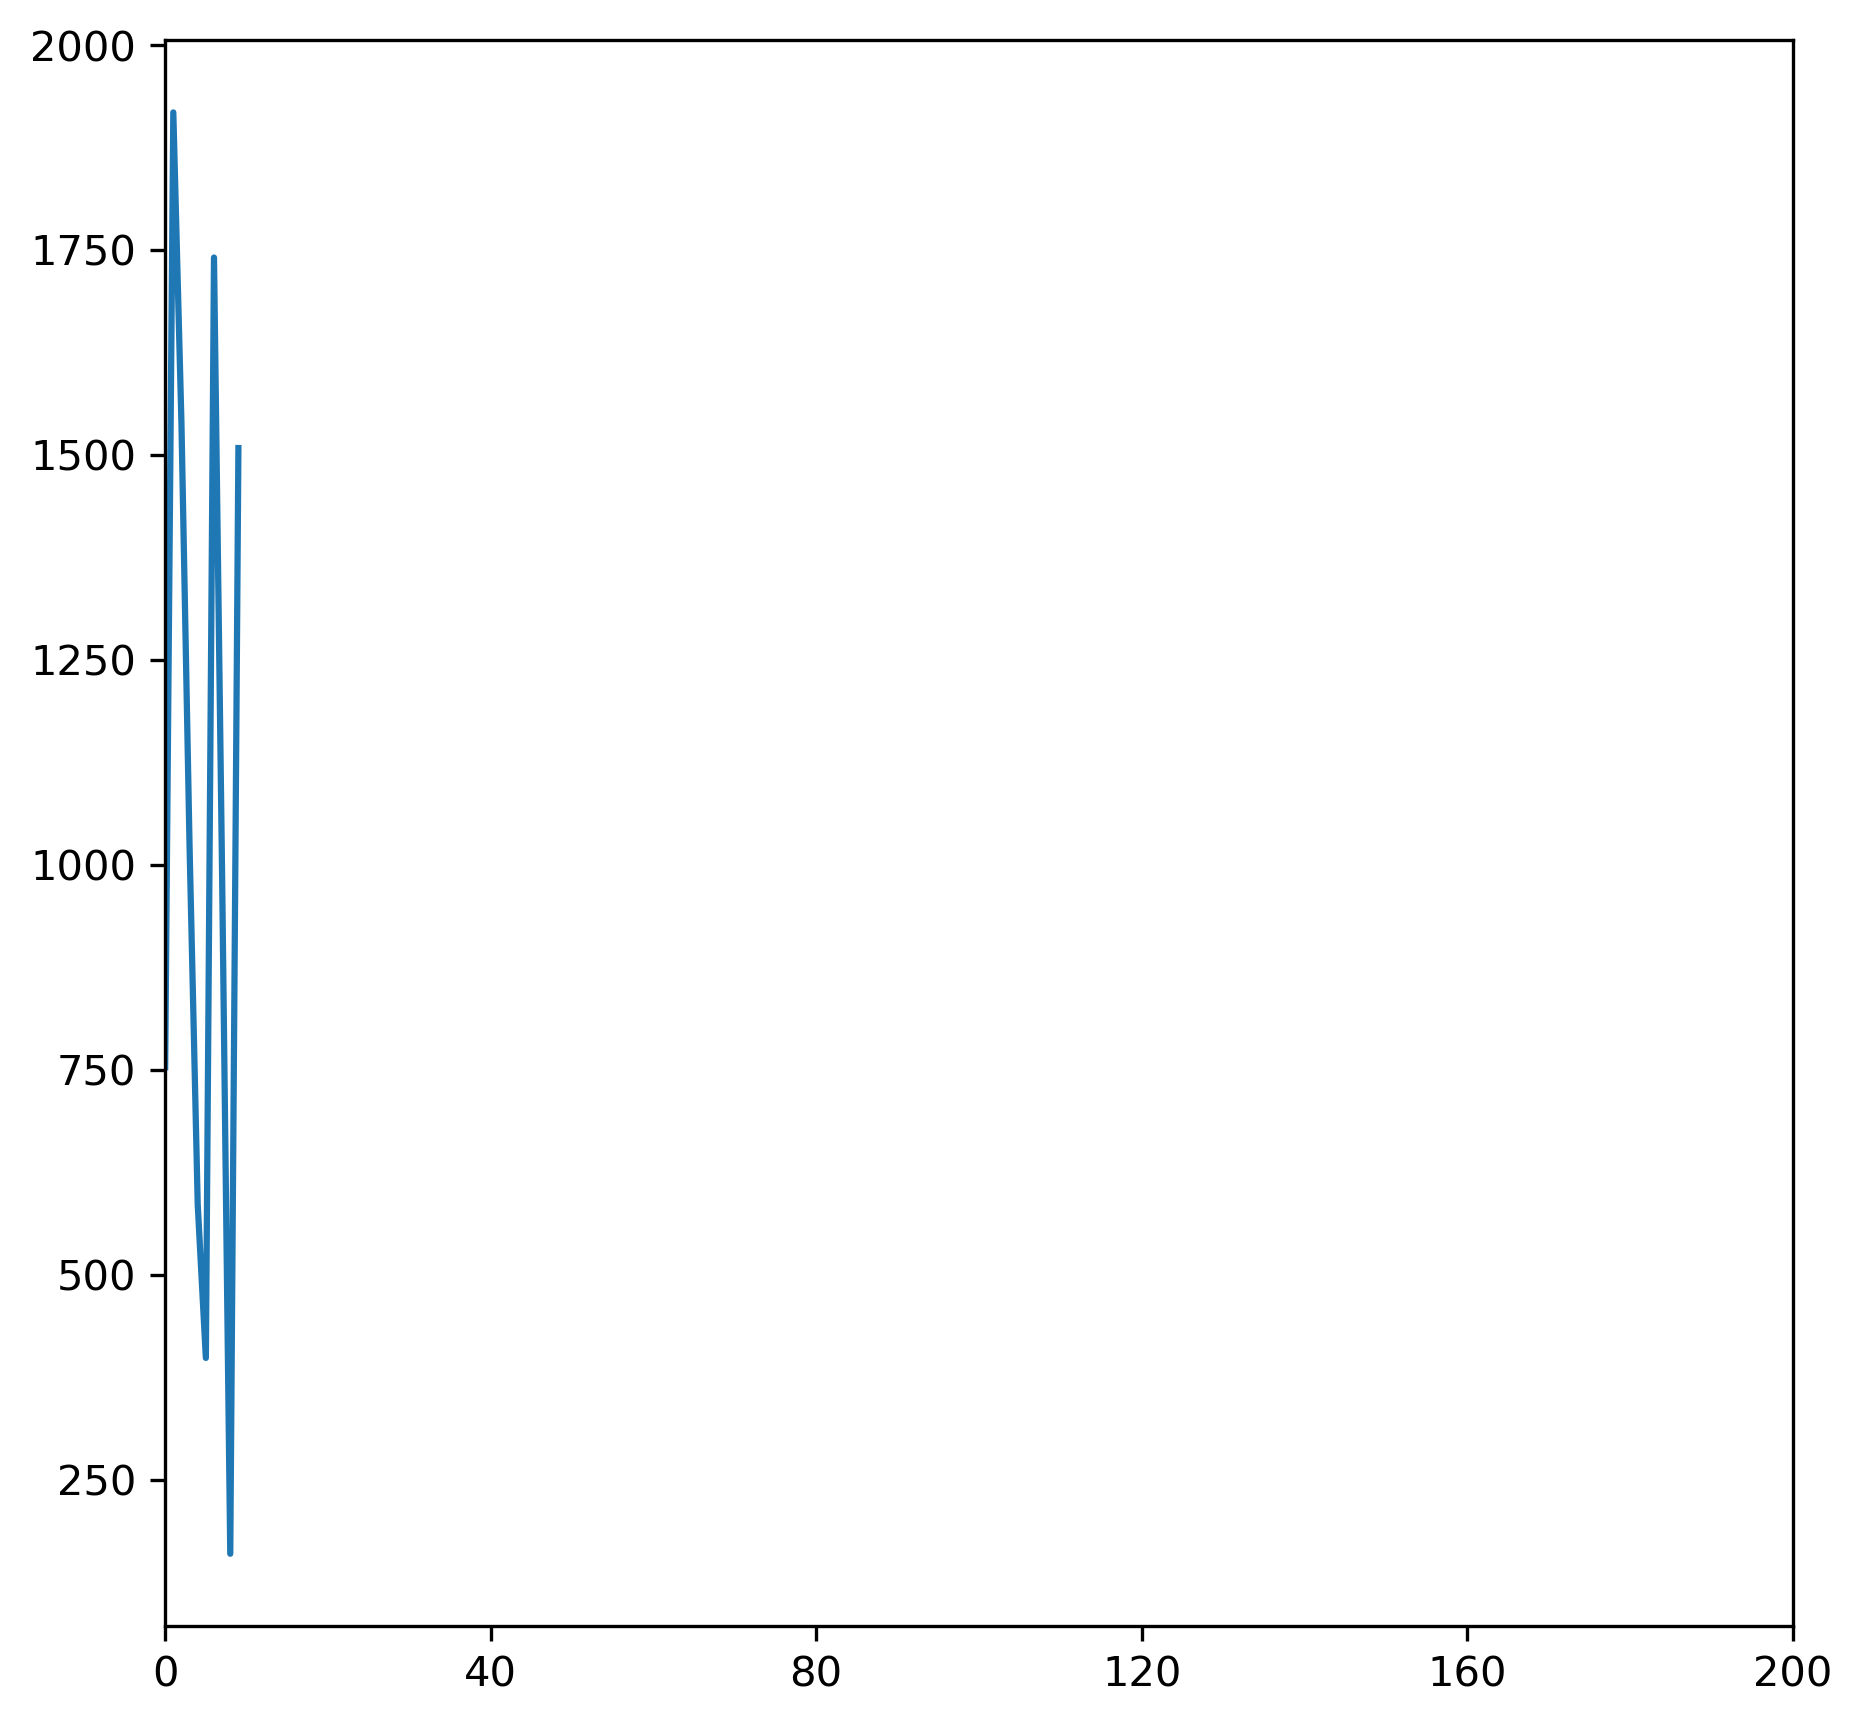

[Text(0.0, 0, '0'),
 Text(40.0, 0, '40'),
 Text(80.0, 0, '80'),
 Text(120.0, 0, '120'),
 Text(160.0, 0, '160'),
 Text(200.0, 0, '200')]

In [140]:



ax1.set_xlim([0,200])


#locator.set_axis(ax.xaxis)
#pyplot.show()
locator = MaxNLocator(nbins=5)
locator.set_axis(ax1.xaxis)
ax1.set_xticks(locator())
pyplot.show()
ax1.set_xticklabels(ax1.get_xticklabels(),fontticklabel)
#ax.set_xticks(locator())

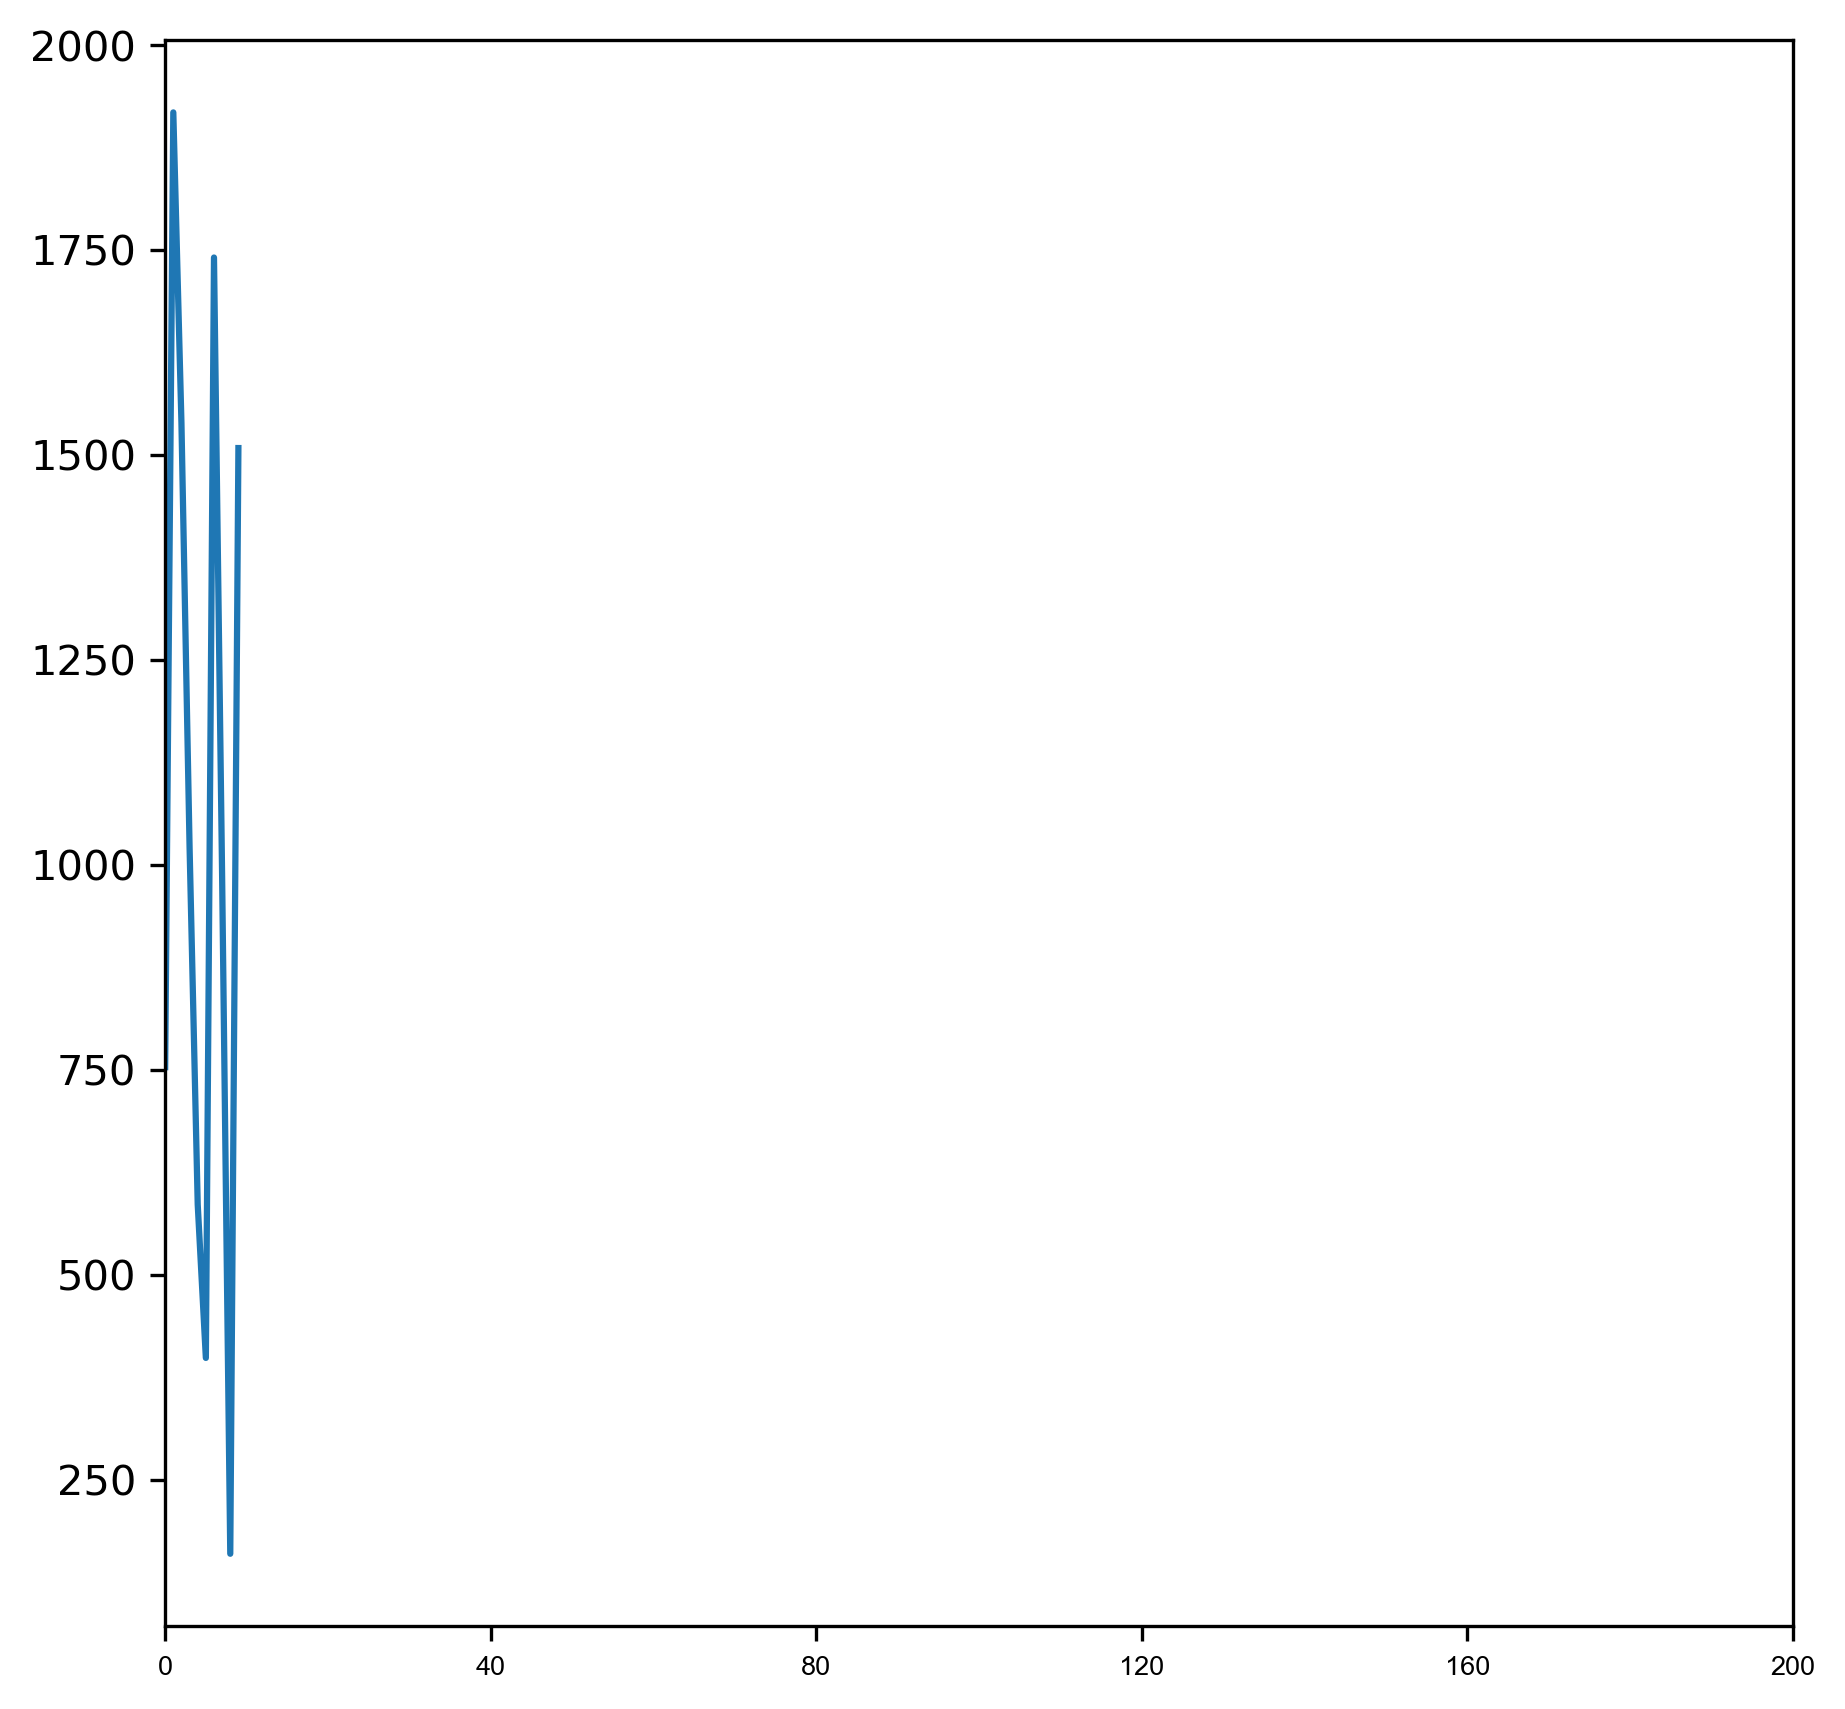

In [141]:

fig

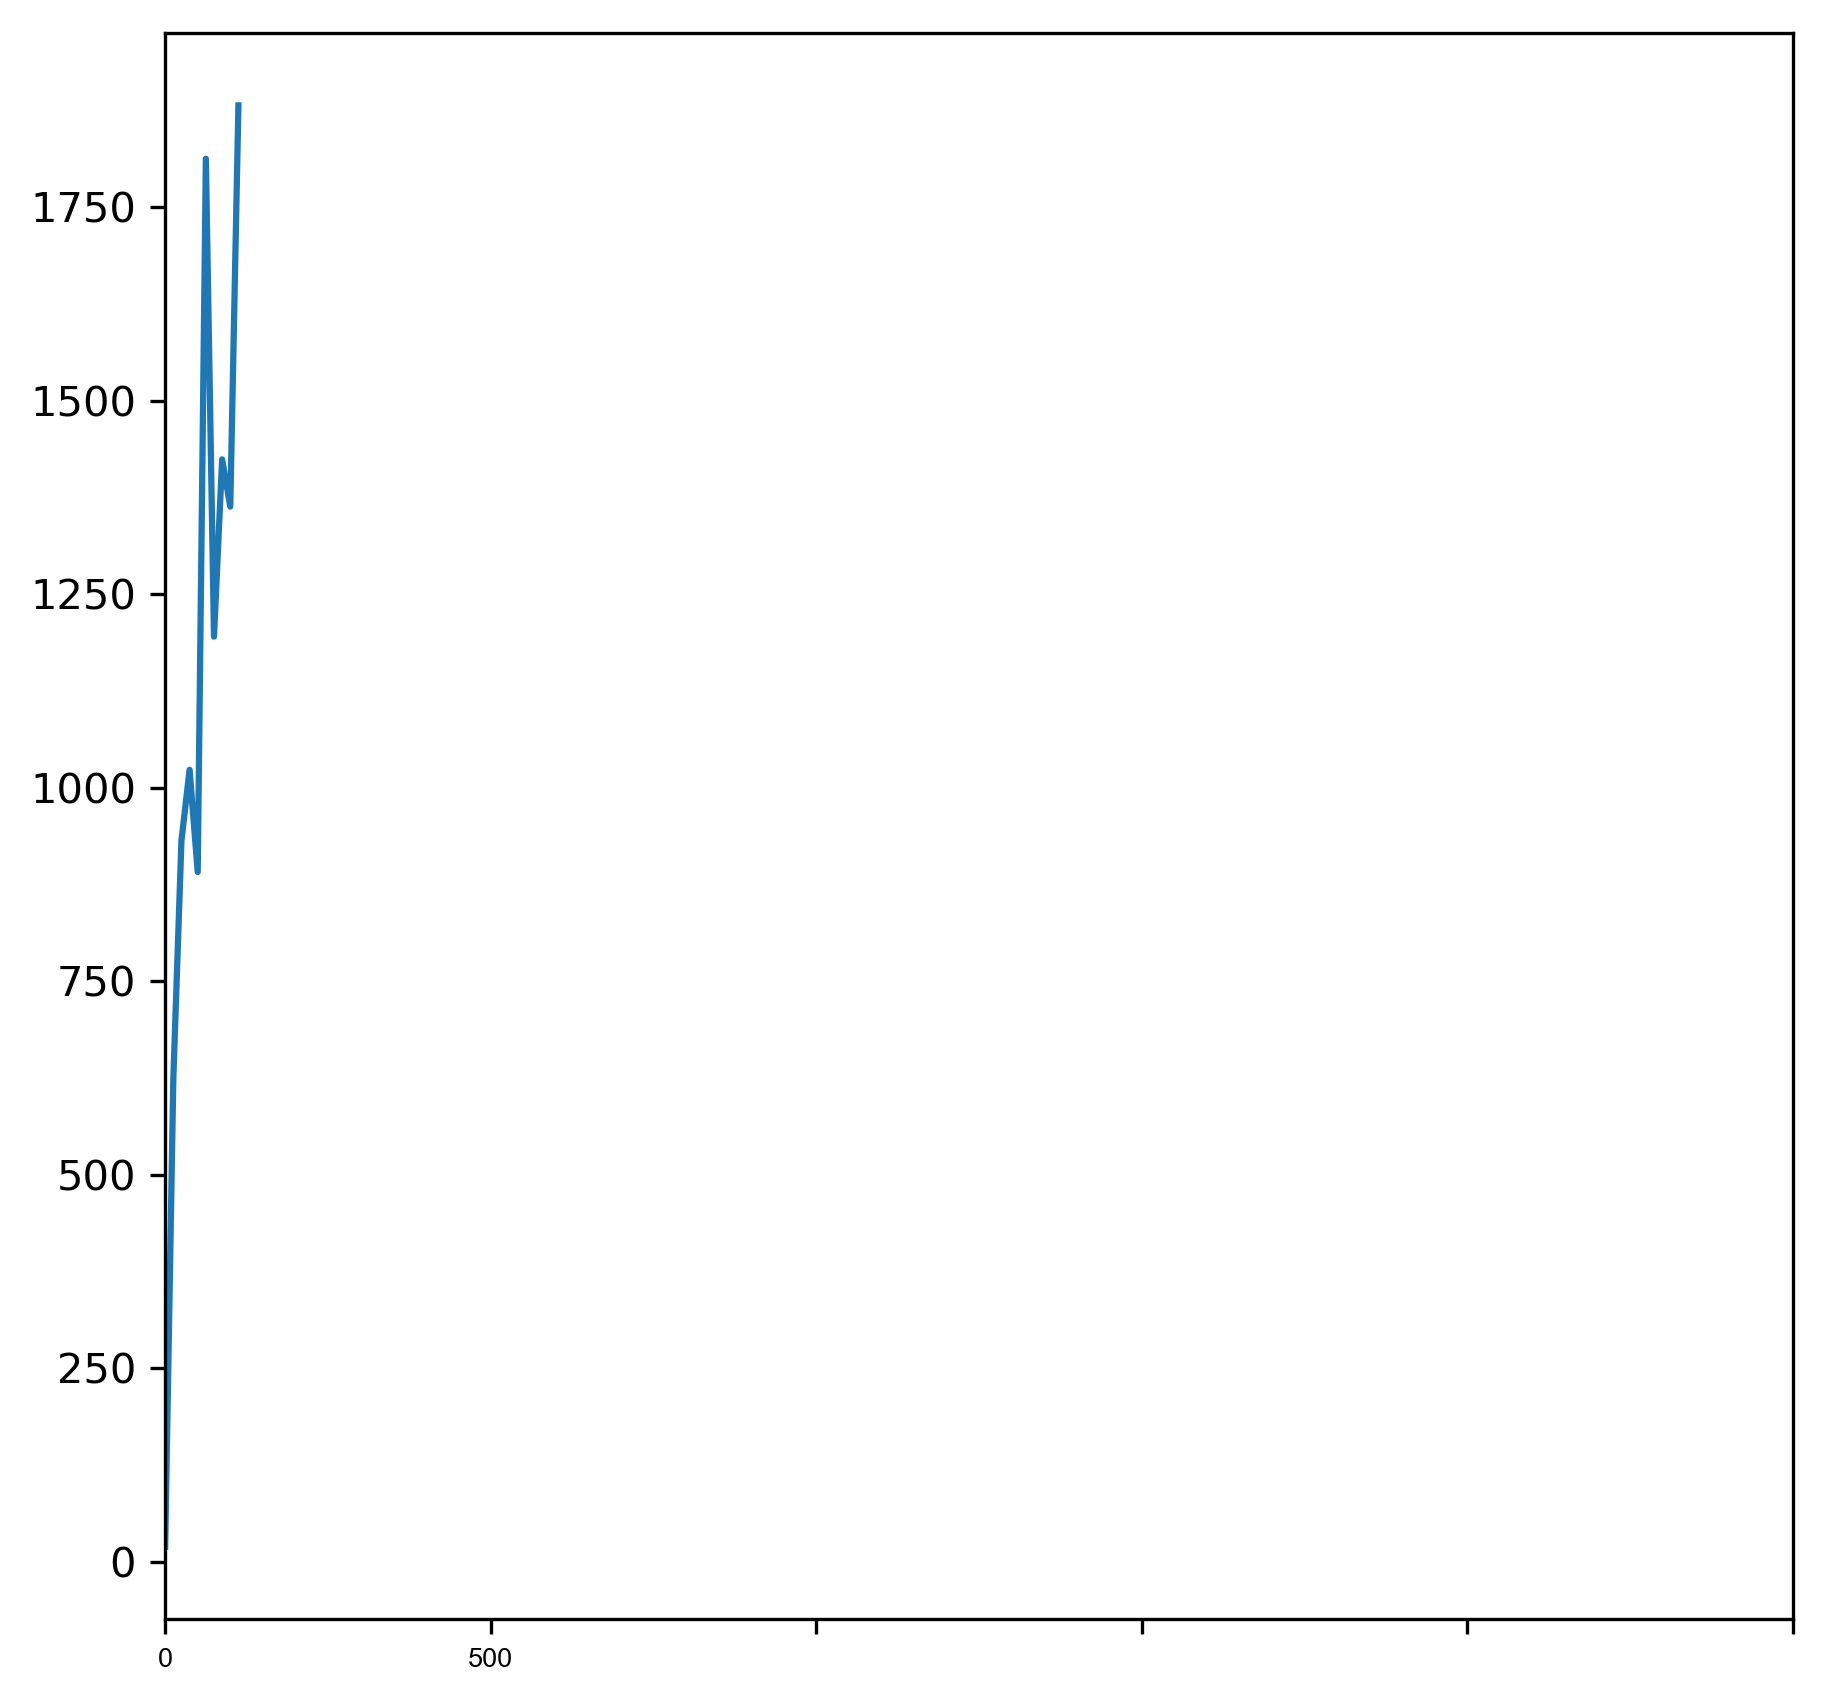

In [132]:
fig

In [ ]:
locator.set_axis(ax1.xaxis)
ax1.set_xticks(locator())

In [106]:
locator = MaxNLocator(nbins=10)

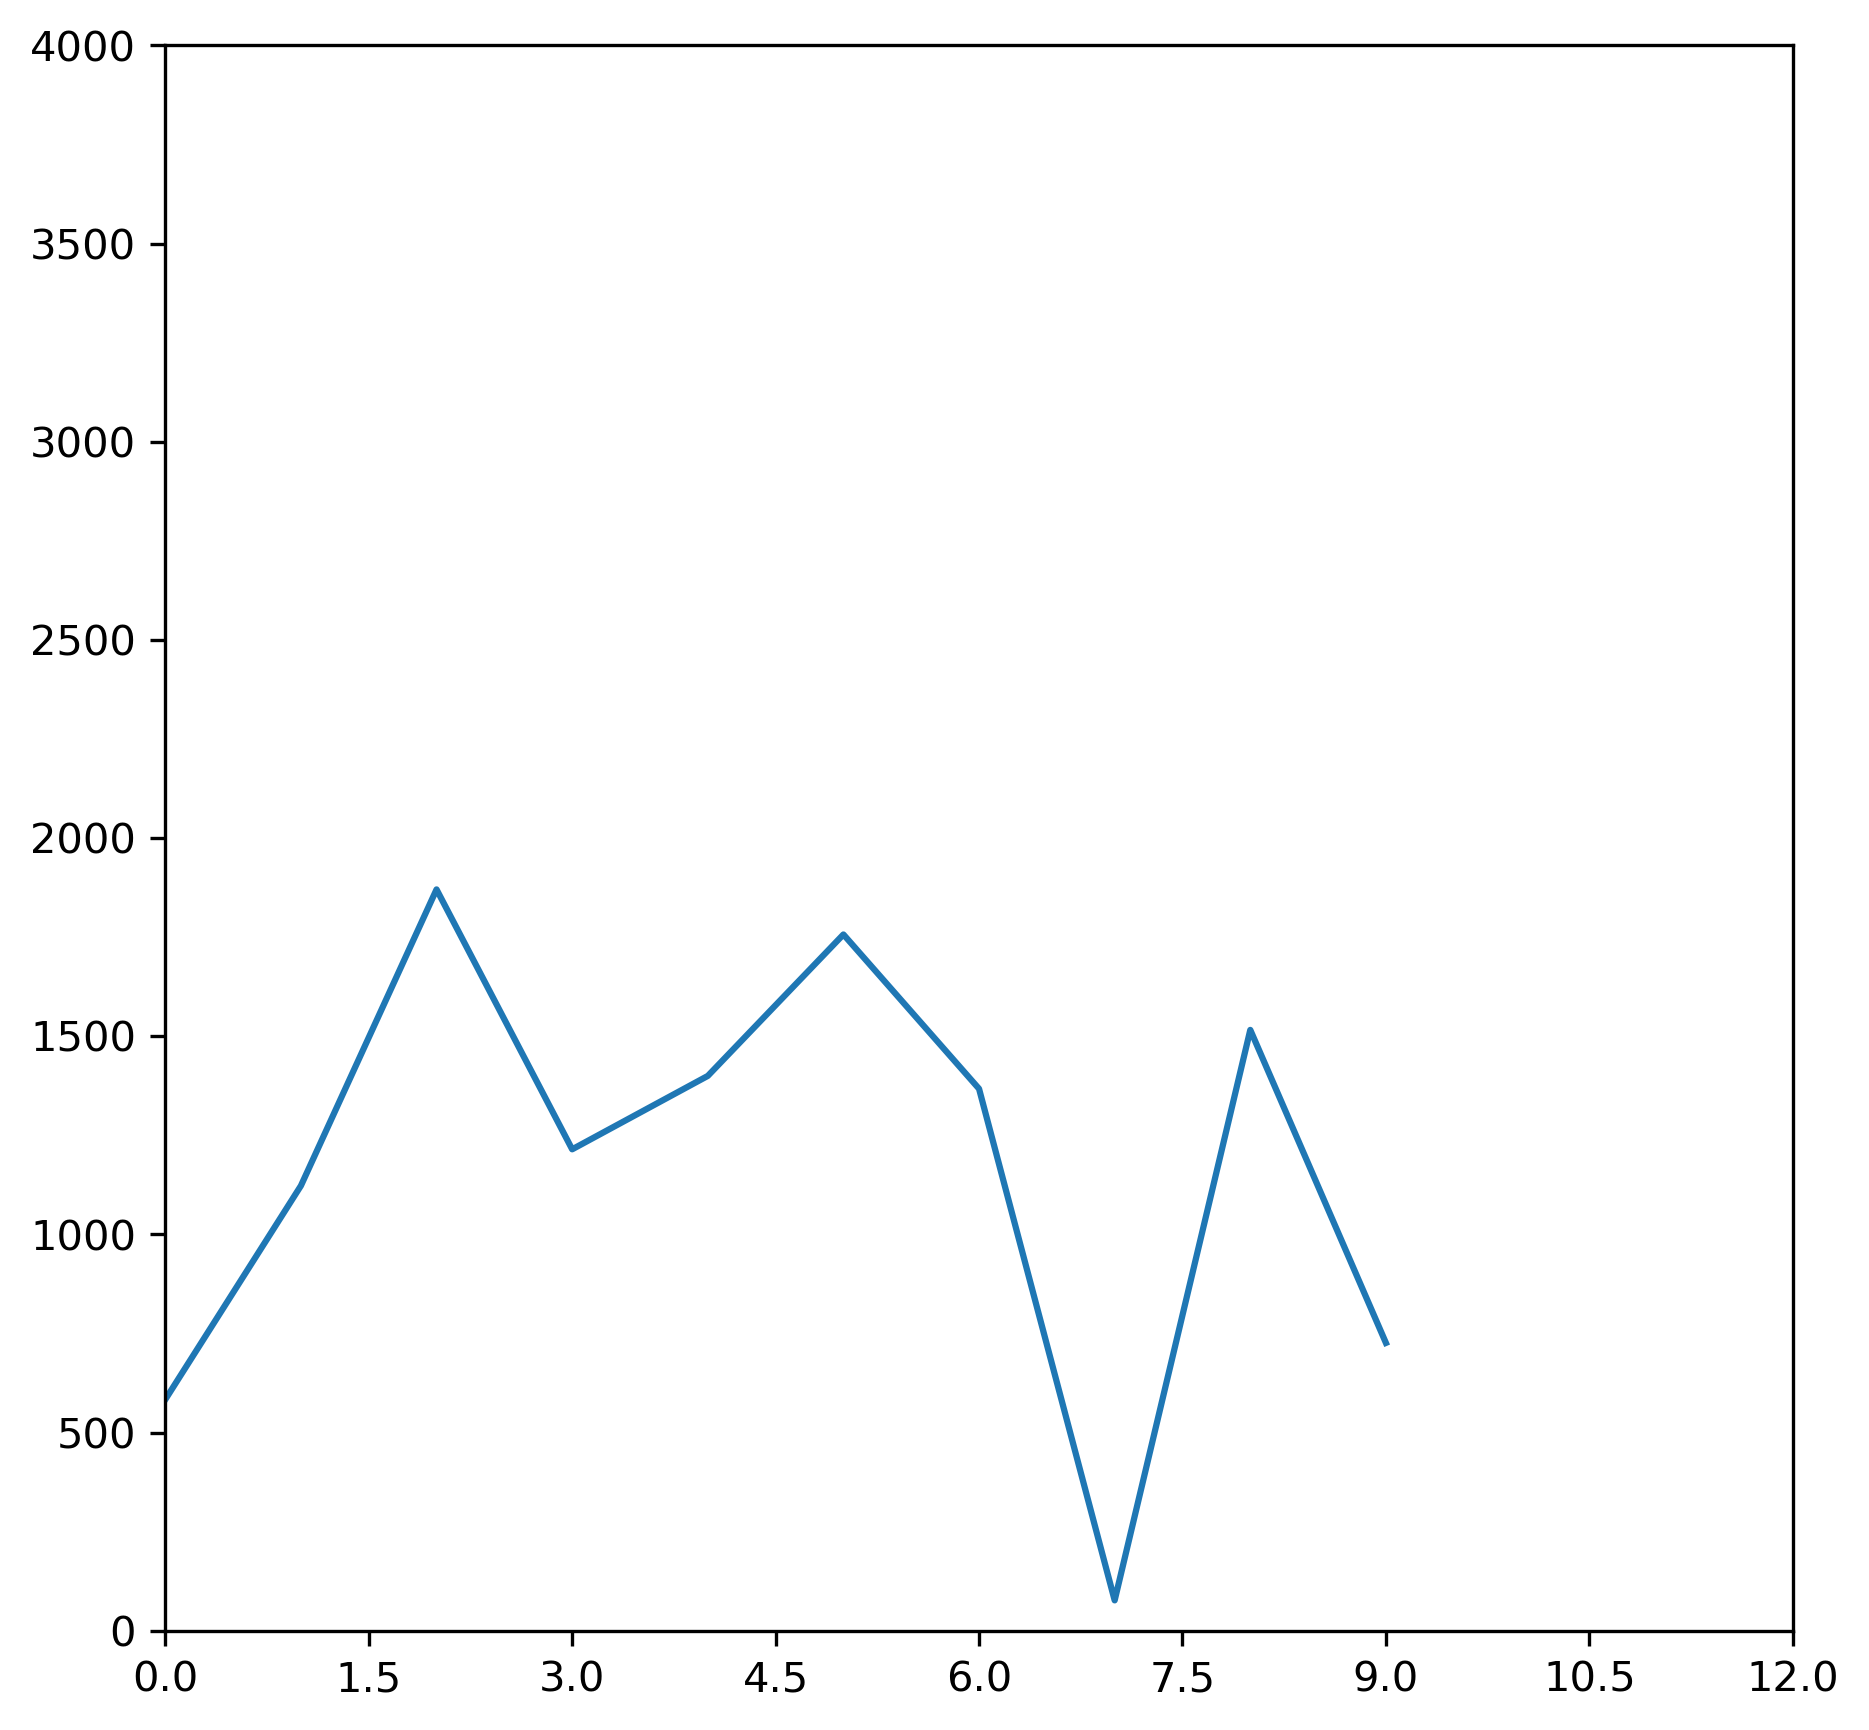

In [108]:
locator.set_axis(ax1.xaxis)
ax1.set_xticks(locator())
ax1.set_xlim([0,12])
fig

In [94]:
MaxNLocator()

In [98]:
vars(locator)

{'_nbins': 10,
 '_symmetric': False,
 '_prune': None,
 '_min_n_ticks': 10,
 '_steps': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  4. ,  5. ,  6. ,  8. , 10. ]),
 '_extended_steps': array([ 0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.8 ,
         1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  4.  ,  5.  ,  6.  ,  8.  ,
        10.  , 15.  ]),
 '_integer': False}